## TEST

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the CSV file of city parks. Then creating a new DataFrame called "parks_count". This allows us to organize the data into two columns, Neighborhood and Number of Parks.  

In [6]:
parks_df = pd.read_csv("City Parks.csv")

parks_count = parks_df.groupby("neighborhood")['name'].count().reset_index()
parks_count.columns = ['Neighborhood', 'Number of Parks']
parks_count = parks_count.sort_values(by='Number of Parks', ascending=False)
print(parks_count)


                 Neighborhood  Number of Parks
22               East Liberty               12
13  Central Business District               10
5                   Beechview                8
57          South Side Slopes                7
50               Point Breeze                7
..                        ...              ...
9                     Bon Air                1
14      Central Lawrenceville                1
60        Squirrel Hill North                1
62            Stanton Heights                1
72                    Windgap                1

[73 rows x 2 columns]


## Importing the Neighborhoods map shape file. 

<Axes: >

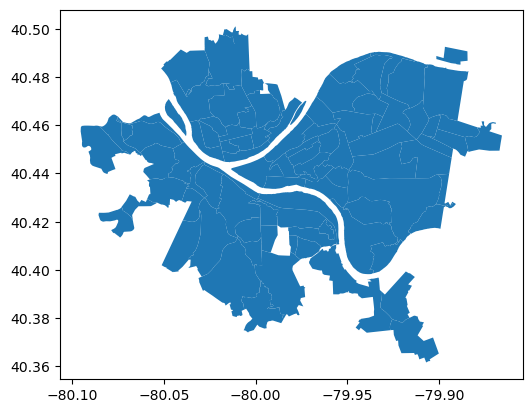

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe


In [7]:
parks_map = neighborhoods.merge(parks_count, how='left', left_on='hood', right_on='Neighborhood')
parks_map[['hood','Number of Parks','geometry']].head()

,hood,Number of Parks,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.9623 40.44294, -79.9622 40.44289..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<Axes: >

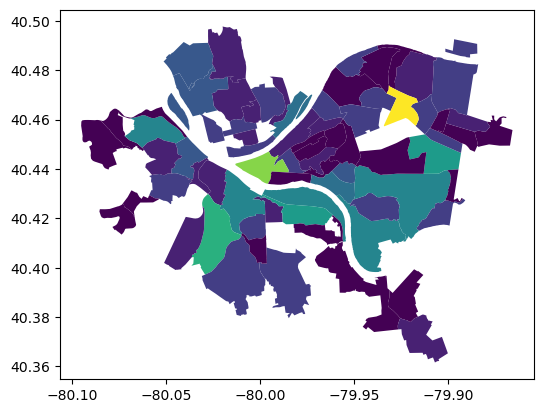

In [8]:
parks_map.plot(column='Number of Parks')

## Map is imported but the lack of a legend makes this map confusing. The next block will focus on using plot() to set our legend and colours. 

<Axes: >

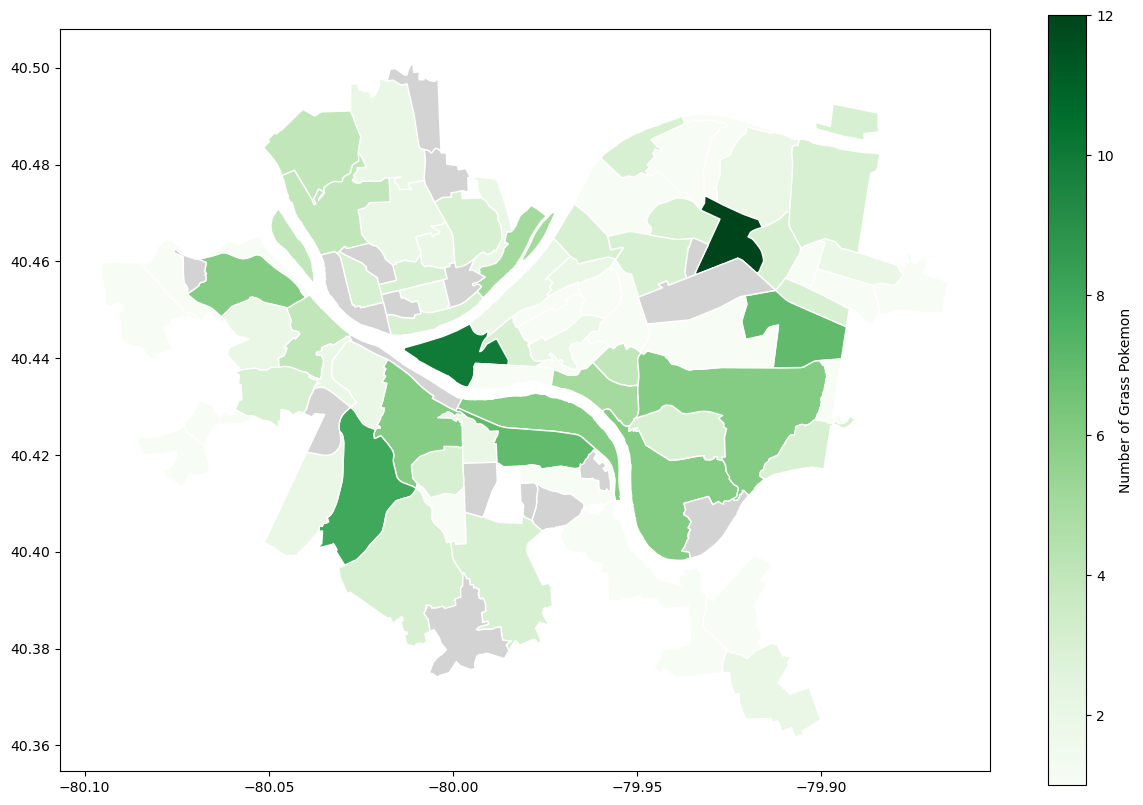

In [11]:
parks_map.plot(column='Number of Parks', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Grass Pokemon"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )